In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('Picture_Roaring_Dataset.csv')

In [3]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of       Textbook_ID            ISBN Publication_Date Publication_Mode  \
0            7981  CA-2014-103800       03-01-2014   Standard Class   
1             740  CA-2014-112326       04-01-2014   Standard Class   
2             741  CA-2014-112326       04-01-2014   Standard Class   
3             742  CA-2014-112326       04-01-2014   Standard Class   
4            1760  CA-2014-141817       05-01-2014   Standard Class   
...           ...             ...              ...              ...   
9989          908  CA-2017-143259       30-12-2017   Standard Class   
9990          909  CA-2017-143259       30-12-2017   Standard Class   
9991         1297  CA-2017-115427       30-12-2017   Standard Class   
9992         1298  CA-2017-115427       30-12-2017   Standard Class   
9993         5092  CA-2017-156720       30-12-2017   Standard Class   

     Customer ID      Customer Name        Country           City  \
0       DP-13000      Darren Powers  United Stat

In [4]:
data['Target'] = (data['Textbook_ID'].shift(-1) > data['Textbook_ID']).astype(int)

In [5]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [6]:
# Gathering the Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Textbook_ID', 'Roaring_Content_type', 'Roaring_Page_Number', 'Roaring_Sound_Length']])
print(scaled_data)

[[ 1.0341352  -0.34243459 -1.42076411 -1.41520622]
 [-1.47572671 -0.34991837 -1.42255154 -1.41305607]
 [-1.47538009  0.06880141 -1.42219405 -1.41377279]
 ...
 [-1.28266041 -0.34651665  1.76478889  1.76737382]
 [-1.28231379 -0.3355798   1.76514638  1.76773218]
 [ 0.03275541 -0.36397454  1.76550386  1.76809054]]


In [7]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [8]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(log_reg_accuracy)

0.8939469734867433


In [12]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(dt_accuracy)

0.8449224612306153


In [13]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(rf_accuracy)

0.8839419709854928


In [14]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

0.87943971985993


In [15]:
# ARIMA Model
# Assuming you have time series data for ARIMA
# Splitting data for ARIMA
train_data = data[:int(0.8*(len(data)))]
test_data = data[int(0.8*(len(data))):]

In [16]:
# LSTM Model
# Assuming you have sequential data for LSTM
# Reshape the data
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=1))

In [18]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

Epoch 1/100
250/250 [==============================] - 4s 5ms/step - loss: 0.1523
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0870
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0864
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0858
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0851
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0854
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0850
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0853
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0846
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0842
Epoch 11/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0845
Epoch 12/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0847
Epoch 13/100


In [ ]:
# Predictions
lstm_predictions = lstm_model.predict(X_test_lstm)

34/34 [==============================] - 2s 5ms/step


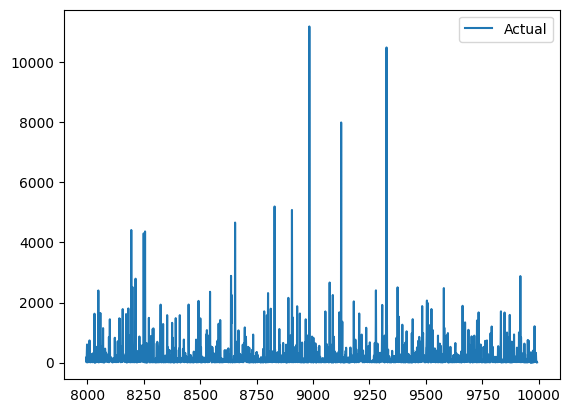

In [22]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Roaring_Content_type'], label='Actual')
plt.legend()
plt.show()

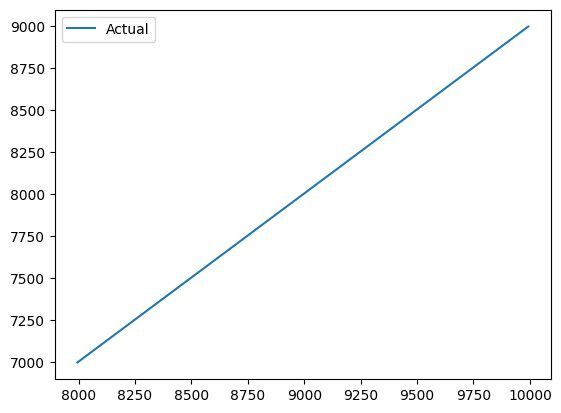

In [24]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Roaring_Page_Number'], label='Actual')
plt.legend()
plt.show()

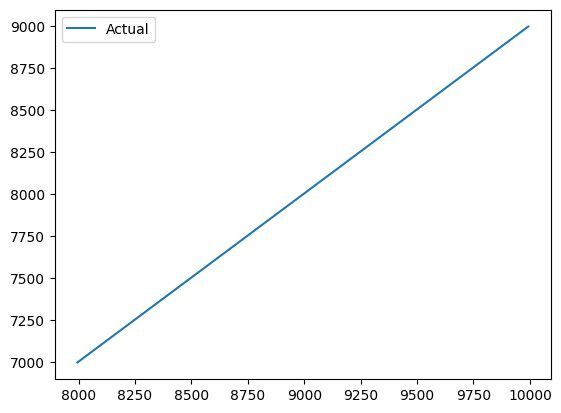

In [26]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Roaring_Sound_Length'], label='Actual')
plt.legend()
plt.show()